# **Riduzione della Dimensionalità**

## Dataset MNIST_784: Panoramica

Il dataset **MNIST_784** è un dataset molto popolare di cifre scritte a mano, ampiamente utilizzato in machine learning e deep learning per **classificazione di immagini**.

## Caratteristiche Chiave:
**Tipo di dati**: Immagini

* **Contenuto**: Cifre scritte a mano (da 0 a 9)

* **Numero di Campioni**: 70.000 immagini

* **Dimensione Immagine**: 28x28 pixel (appiattite in 784 caratteristiche per campione) 

* **Caratteristiche delle Immagini**: Ogni immagine è rappresentata come un array 1D di 784 valori di intensità dei pixel (scala di grigi)

* **Classi**: 10 classi (cifre da 0 a 9).

Il dataset può essere accessibile direttamente attraverso piattaforme come `scikit-learn`

## Perché "784"?

Il nome "mnist_784" fa riferimento ai 784 pixel che compongono l' immagine. Supponendo infatti di calcolare quanti pixel contiene la singola immagine troviamo che:

**28 x 28 = 784**


Digitalmente un' immagine è una **matrice** contenente valori numerici discreti nell' intervallo [0, 255] che rappresentano **l' intensità del pixel** in scala di grigi. 

Per quanto riguarda le immagini a colori viene introdotta una terza dimensione che è il **canale**. Tipicamente un' immagine a colore è in formato **RGB (Red, Green, Blue)** e possiede 3 canali. 

Un pixel sarà quindi la combinazione del valore di Rosso, Verde e Blu per quel singolo pixel.

Nel caso del dataset **mnist_784** ogni singola immagine viene considerata come vettore unidimensionale (1D), in cui tutti i pixel vengono allineati.

Per semplicità consideriamo un' immagine di risoluzione 3x3:

```
 [255, 128, 64]
 [ 0, 128, 192]
 [ 64, 255,  0]
```

Se trasformo l' immagine in un vettore unidimensionale ottengo:

```
[255, 128, 64, 0, 128, 192, 64, 255, 0]
```

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml

# 1: Carichiamo il dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False,parser='auto')
X = mnist.data
y = mnist.target.astype(int)

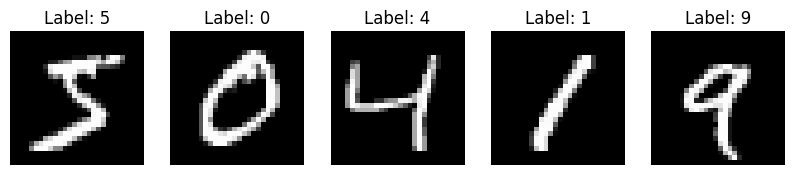

In [4]:
import matplotlib.pyplot as plt

# Funzione per stampare alcune immagini
def display_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i in range(num_images): 
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray') 
        axes[i].set_title(f'Label: {labels[i]}')
        axes[i].axis('off')
    plt.show()

# Decidiamo il numero di immagini da visualizzare e stampiamole utilizzando la funzione display_images
num_samples = 5
display_images(X[:num_samples], y[:num_samples], num_images=num_samples)


### **Metodo `.shape`**

Un metodo molto utile degli array, soprattutto nel caso di array molto grandi, è:

- [numpy.shape](https://numpy.org/doc/2.1/reference/generated/numpy.shape.html): Stampa le dimensioni di un array.

In [4]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

a.shape

(2, 5)

## **Principal Component Analysis (PCA)**

La **PCA** è una tecnica utilizzata per ridurre la dimensionalità dei dati preservando la maggior parte della variazione presente nel dataset originale. 

L'obiettivo della PCA è trasformare i dati in un nuovo sistema di coordinate, in cui le prime componenti principali catturano la maggior parte della varianza. Questo può semplificare l'analisi e la visualizzazione dei dati, riducendo il rumore e migliorando l'efficienza computazionale.

### **Come si usa la PCA?**

Per applicare la PCA ci sono degli step da seguire:

1. **Standardizzazione dei dati**: Per rendere le features comparabili tra loro viene eseguita la standardizzazione.

2. **Calcolo della matrice della covarianza**: rappresente la variazione di ogni variabile rispetto alle altre (inclusa se stessa).

3. **Calcolo degli autovalori e autovettori**: Vengono calcolati gli autovalori della matrice di covarianza, che rappresentano la varianza espressa dalle componenti principali, e gli autovalori, che rappresentano le direzioni delle componenti principali. 

4. **Ordinamento**: Si ordnano gli autovalori (e i corrispettivi autovettori) in ordine decresente in base alla varianza espressa.

5. **Selezione delle top-n componenti**: Si scelgono il numero di componenti desiderato che più esprimono varianza.

6. **Trasformazione dei dati**: SI proiettano i dati lungo le componenti principali scelte, ottenendo la riduzione di dimensione desiderata.

## **Step 1 - Standardizzazione**

Per standardizzare i dati applichiamo la **Z-normalization** che consiste nel trasformare i dati in modo che abbiano:

    - media = 0
    - deviazione standard = 1

Per fare ciò utilizzeremo le funzioni di numpy:

- [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html): Calcola la media lungo un asse specifico.
- [numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html): Calcola la deviazione standard lungo un asse specifico.

### **Broadcasting**

Prima di procedere però osserviamo una proprietà fondamentale che offre NumPy. 

In [6]:
prezzi = np.array([100, 200, 300, 400])  # Array NumPy
sconto = 0.10  # Valore scalare

prezzi_scontati = prezzi - prezzi * sconto  # Broadcasting automatico

print(prezzi_scontati)

[ 90. 180. 270. 360.]


In [13]:
voti = np.array([[80, 85, 90], 
                 [75, 80, 95], 
                 [60, 70, 80]])  # 3 studenti con 3 voti ciascuno

bonus = np.array([5, 10, 15])  # Bonus per ogni materia

voti_finali = voti + bonus  # Broadcasting applicato!

print(voti_finali)

[[ 85  95 105]
 [ 80  90 110]
 [ 65  80  95]]


Notiamo inoltre come in alcune funzioni di NumPy è possibile specificare l' **asse** lungo cui applicarle. Specificando l' asse tra gli argomenti della funzione possiamo ottenere diversi risultati.

In [43]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

# Calcoliamo la media di A

mean_A = np.mean(A, axis=0) # axis = 0 indica che vogliamo calcolare la media sulle colonne
                            # axis = 1 indica che vogliamo calcolare la media sulle righe
                            # axis = None indica che vogliamo calcolare la media su tutti gli elementi

print(f'Media di A: {mean_A}')

Media di A: [4. 5. 6.]


In [13]:

# Calcoliamo la media dei dati
# svolgimento...
X_mean = np.mean(X, axis=1,keepdims=True) #senza  questo parametro non va

print(f'Media di X: {X_mean}')

# Sottraggo la media da ogni riga di X
# svolgimento...
X_center = X - X_mean

print(f'Media sottratta: {X_center.shape}')
# Calcoliamo la deviazione standard dei dati centrati
# svolgimento...

X_std = np.std(X_center,axis=0)

# Per standardizzare i dati utilizzo la formula: dati_centrati / deviazione_standard + 1e-6
# 1e-6 è un valore piccolo aggiunto per evitare divisioni per zero
# svolgimento...

X_standardizzato = X_center / (X_std + 1e-6)

print(f'Dati siandardizzati: {X_standardizzato.shape}')


Media di X: [[35.10841837]
 [39.6619898 ]
 [24.7997449 ]
 ...
 [37.28443878]
 [33.87627551]
 [53.35841837]]
Media sottratta: (70000, 784)
Dati siandardizzati: (70000, 784)


## **Step 2 - Calcolo della matrice di covarianza**

Per calcolare la matrice di covarianza utilizziamo la funzione di NumPy:

- [numpy.cov](https://numpy.org/doc/stable/reference/generated/numpy.cov.html): Calcola la matrice di covarianza dei dati.

In [14]:
# Calcoliamo la matrice di covarianza utilizzando la funzione np.cov a cui dobbiamo passare come parametro i dati standardizzati.

# N.B. la funzione np.cov richiede di default tratta le righe come variabili e le colonne come osservazioni
# nel nostro caso vogliamo fare il contrario, quindi dobbiamo specificare il parametro rowvar=False


matrice_covarianza = np.cov(X_standardizzato, rowvar=False)

print("Matrice di Covarianza:\n", matrice_covarianza)


Matrice di Covarianza:
 [[1.00001411 1.00001411 1.00001411 ... 1.00001411 1.00001411 1.00001411]
 [1.00001411 1.00001411 1.00001411 ... 1.00001411 1.00001411 1.00001411]
 [1.00001411 1.00001411 1.00001411 ... 1.00001411 1.00001411 1.00001411]
 ...
 [1.00001411 1.00001411 1.00001411 ... 1.00001411 1.00001411 1.00001411]
 [1.00001411 1.00001411 1.00001411 ... 1.00001411 1.00001411 1.00001411]
 [1.00001411 1.00001411 1.00001411 ... 1.00001411 1.00001411 1.00001411]]


## **Step 3 - Calcolo degli autovalori e autovettori**

Per calcolare autovalori e autovettori utilizziamo la funzione di NumPy:

- [numpy.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html): Calcola autovalori e autovettori di una matrice simmetrica.

In [16]:
# Calcoliamo gli autovalori e autovettori della matrice di covarianza. Utilizziamo la funzione np.linalg.eigh a cui passiamo come parametro la matrice di covarianza.

# N.B. la funzione np.linalg.eigh restituisce una tupla con due elementi, rispettivamente:
# - un array con gli autovalori in ordine crescente
# - una matrice con gli autovettori corrispondenti
# a noi interessa salvarli entrambi in due variabili distinte


# svolgimento...

autovalori, autovettori = np.linalg.eigh(matrice_covarianza)

# Stampa dei risultati
print("Autovalori:\n", autovalori)
print("\nAutovettori:\n", autovettori)


Autovalori:
 [-2.92722747e-14 -5.37295532e-15 -4.82504202e-15 -3.85807078e-15
 -3.39445792e-15 -2.97578061e-15 -2.08182071e-15 -2.05406158e-15
 -1.59988258e-15 -1.35528746e-15 -1.11286575e-15 -8.09915014e-16
 -7.08984146e-16 -6.55449550e-16 -5.62672274e-16 -5.58313964e-16
 -5.27242268e-16 -4.53257352e-16 -4.42589847e-16 -3.29542824e-16
 -3.08620299e-16 -3.03692902e-16 -2.08469136e-16 -1.89618048e-16
 -1.36161978e-16 -1.25145284e-16 -1.20205890e-16 -1.02043119e-16
 -6.50318475e-17 -4.02627874e-17 -1.27881494e-17 -6.30165095e-18
 -2.38295040e-18 -3.52033659e-19 -1.71151714e-19  3.45083245e-20
  6.30914697e-20  1.15072329e-18  1.36805261e-18  4.08011515e-18
  2.12087659e-17  5.34775378e-17  1.04829268e-16  1.52071636e-16
  1.65608826e-16  2.36484304e-16  2.38638300e-16  2.62024073e-16
  2.95459126e-16  3.41624771e-16  3.57985470e-16  4.71731131e-16
  7.36971205e-16  7.99957457e-16  8.23924977e-16  9.44789961e-16
  1.09745006e-15  1.19586759e-15  1.40104886e-15  1.59375050e-15
  2.16796935

## **Step 4 - Ordinare gli autovalori e autovettori**

Per ordinare gli autovalori e autovettori in ordine decrescente utilizziamo la funzione di NumPy:
- [numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html): Ritorna gli indici degli autovalori ordinati in ordine crescente.

Poichè a noi interessa l' ordine decrescente, dobbiamo invertire questi indici. Vediamo di seguito un modo veloce e compatto per farlo.

In [50]:
lista = [1, 2, 3, 4, 5]

# La notazione di slicing [::-1] segue il ormato [start:stop:step]:
# - start: indice di partenza
# - stop: indice di fine
# - step: passo
# Se non specifico start e stop, vengono considerati tutti gli elementi
# Se specifico step = -1, vengono considerati gli elementi in ordine inverso

lista_invertita = lista[::-1]

print("Lista originale:", lista)
print("Lista invertita:", lista_invertita)

Lista originale: [1, 2, 3, 4, 5]
Lista invertita: [5, 4, 3, 2, 1]


In [18]:
# Sulla base dell' esempio fatto sopra e con la funzione np.argsort ordiniamo in ordine decrescente gli autovalori.
# Lo stesso ordinamento deve essere poi eseguito anche sugli autovettori.

# Estraiamo gli indici degli autovalori ordinari in ordine decrescente

# svolgimento...
indici_ordinati = np.argsort(autovalori)[::-1]

# Ordiniamo gli autovalori utilizzando i nuovi indici

# svolgimento...

autovalori_ordinati = autovalori[indici_ordinati]


# Ordiniamo gli autovettori utilizzando i nuovi indici
# N.B. Nella matrice degli autovalori ogni colonna rappresenta un autovettore, quindi dobbiamo ordinare le colonne e non le righe.

# svolgimento...
autovettori_ordinati = autovettori[:, indici_ordinati]

print("Autovalori ordinati:\n", autovalori_ordinati)
print("\nAutovettori ordinati:\n", autovettori_ordinati)



Autovalori ordinati:
 [ 2.82953723e+02  2.96655837e+01  2.75503685e+01  2.69423192e+01
  2.03243190e+01  1.67835318e+01  1.39443632e+01  1.21646093e+01
  1.14245608e+01  1.02038932e+01  9.42813959e+00  8.19072598e+00
  7.80366414e+00  7.72485215e+00  7.09655124e+00  6.89692585e+00
  6.33811546e+00  6.23597522e+00  6.00258533e+00  5.56467618e+00
  5.48197503e+00  5.30705099e+00  5.04899349e+00  4.68835287e+00
  4.56455410e+00  4.38370702e+00  4.21090711e+00  4.16538845e+00
  3.97710065e+00  3.81983742e+00  3.68704076e+00  3.53997890e+00
  3.48874801e+00  3.43147702e+00  3.27499544e+00  3.24514859e+00
  3.05761992e+00  3.00660179e+00  2.92976194e+00  2.81823118e+00
  2.72673822e+00  2.63128195e+00  2.59289702e+00  2.54102742e+00
  2.43449475e+00  2.38299062e+00  2.31465659e+00  2.24843580e+00
  2.21006059e+00  2.15945937e+00  2.11322355e+00  2.05830773e+00
  2.02031548e+00  1.97161251e+00  1.96432436e+00  1.92094763e+00
  1.87669495e+00  1.83121940e+00  1.79804749e+00  1.73420642e+00
  1

## **Step 5 - Selezionare le top-n componenti**

Selezioniamo le top-n componenti che esprimono maggiore varianza nel dataset. In generale, per avere una migliore rappresentazione grafica del dataset si scelgono le migliori 2 componenti.

In [23]:
# Selezioniamo il numero di componenti che vogliamo mantenere
n_components = 2

# Selezionare gli autovettori corrispondenti 
# ATTENZIONE: valutiamo correttamente come fare lo slicing. Dobbiamo utilizzare gli indici selezionati 
# per selezionare gli autovettori corrispondenti

# svolgimento...

autovettori_selezionati = autovettori_ordinati[:, :n_components]

print("Autovalori selezionati:", autovalori_ordinati[:n_components])
print("\nAutovettori selezionati:\n", autovettori_selezionati)


Autovalori selezionati: [282.95372314  29.66558374]

Autovettori selezionati:
 [[-0.05930548 -0.00226153]
 [-0.05930548 -0.00226153]
 [-0.05930548 -0.00226153]
 ...
 [-0.05930548 -0.00226153]
 [-0.05930548 -0.00226153]
 [-0.05930548 -0.00226153]]


### **Calcoliamo la varianza espressa**

Calcoliamo quanta varianza viene espressa dal numero di componenti che abbiamo scelto.

In [29]:
# Per calcoalre la percentuale di varianza espressa diviamo gli autovalori selezionati 
# per la somma di tutti gli autovalori 
# Per calcolare la somma di tutti gli autovalori potrebbe essere utile utilizzare la funzione sum()

# svolgimento...


percentuale_varianza = (autovalori_ordinati / np.sum(autovalori_ordinati)) * 100 #percentuale

print("Percentuale di varianza espressa dalle prime due componenti:\n", percentuale_varianza)
print("\nVarianza totale:", np.sum(percentuale_varianza), "%")


Percentuale di varianza espressa dalle prime due componenti:
 [ 3.60905236e+01  3.78382174e+00  3.51402771e+00  3.43647151e+00
  2.59235081e+00  2.14072620e+00  1.77859249e+00  1.55158629e+00
  1.45719369e+00  1.30149851e+00  1.20255175e+00  1.04472062e+00
  9.95351189e-01  9.85298782e-01  9.05159497e-01  8.79697438e-01
  8.08421614e-01  7.95393707e-01  7.65625011e-01  7.09770045e-01
  6.99221580e-01  6.76910156e-01  6.43995126e-01  5.97995700e-01
  5.82205265e-01  5.59138363e-01  5.37097871e-01  5.31292002e-01
  5.07276042e-01  4.87217241e-01  4.70279133e-01  4.51521509e-01
  4.44987049e-01  4.37682180e-01  4.17723078e-01  4.13916136e-01
  3.89997002e-01  3.83489680e-01  3.73688819e-01  3.59463158e-01
  3.47793303e-01  3.35617932e-01  3.30721964e-01  3.24106038e-01
  3.10517880e-01  3.03948568e-01  2.95232617e-01  2.86786208e-01
  2.81891480e-01  2.75437334e-01  2.69539992e-01  2.62535523e-01
  2.57689641e-01  2.51477616e-01  2.50548018e-01  2.45015351e-01
  2.39370957e-01  2.33570586

## **Step 6 - Transformare i dati**

Riduciamo la dimensione del dataset proiettando i dati lungo le componenti principali che abbiamo calcolato. Per ottenere questo risultato utilizziamo la funzione di NumPy:

- [numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html): Calcola il prodotto riga colonna di due array.

In [33]:
# Proiettiamo i dati nello spazio delle componenti principali utilizzando np.dot a cui dobbiamo 
# passare come parametri i dati, e le direzioni lungo cui proiettare.
# N.B. Dobbiamo proiettare i dati standardizzati

# svolgimento...

dati_proiettati = np.dot(X_standardizzato, autovettori_selezionati)

print("Dati proiettati nello spazio delle componenti principali:\n", dati_proiettati)


Dati proiettati nello spazio delle componenti principali:
 [[50.76917515 -7.03988569]
 [60.87340624 -8.34434863]
 [32.56802577  6.44803525]
 ...
 [54.47014699 -4.6558211 ]
 [46.75236526 -9.00458494]
 [78.92362168 -4.64405365]]


## **Visualizzazione dei dati** 

Utilizzando la libreria `matplotlib` per visualizzare i dati trasformati

In [31]:
def plot_pca_2d(X_transformed, y, explained_variance):
    """
    Funzione per visualizzare i dati trasformati in 2D con PCA.

    Parametri:
    - X_transformed: array numpy con le prime due componenti principali (n_samples, 2)
    - y: array numpy contenente le etichette delle classi
    - explained_variance: float, percentuale di varianza spiegata dalle due componenti principali
    
    Output:
    - Un grafico scatter delle immagini nello spazio PCA 2D.
    """
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f"2D plot of Images using PCA with {explained_variance*100:.2f}% variance")
    plt.show()


TypeError: unsupported format string passed to numpy.ndarray.__format__

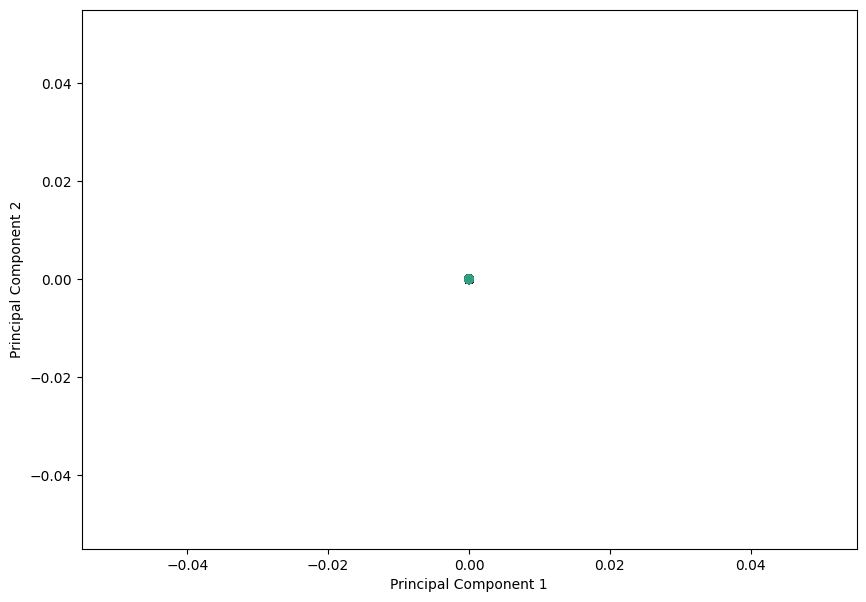

In [47]:
# Chiamare la funzione plot_pca_2d per visualizzare i dati trasformati in 2D
plot_pca_2d(X_standardizzato,y,percentuale_varianza)
# svolgimento...

In [44]:
def plot_pca_with_images(X, X_transformed, y):
    """
    Funzione per visualizzare le immagini proiettate nello spazio delle prime due componenti principali della PCA.

    Parametri:
    - X: array numpy (n_samples, n_features), dataset originale con le immagini appiattite
    - X_transformed: array numpy (n_samples, 2), dataset proiettato sulle prime due componenti principali della PCA
    - y: array numpy contenente le etichette delle classi
    - image_shape: tuple, dimensione originale delle immagini (default: (28, 28) per MNIST)
    - N: int, numero massimo di immagini da visualizzare per classe (default: 20)
    - save_path: str, se fornito, salva il grafico in un file con il percorso specificato
    
    Output:
    - Un grafico con le immagini sovrapposte alla rappresentazione PCA.
    """

    N = 20
    image_shape=(28, 28)
    plt.figure(figsize=(8, 6))
    
    num_classes = len(np.unique(y))
    image_size = 1.5  # Dimensione delle immagini nel plot
    
    for i in range(num_classes):
        indices = y == i
        images = X[indices]
        points = X_transformed[indices]
        
        images = images[:N]
        points = points[:N]
        
        for image, point in zip(images, points):
            image = image.reshape(image_shape)
            plt.imshow(image, extent=(point[0] - image_size / 2, point[0] + image_size / 2,
                                      point[1] - image_size / 2, point[1] + image_size / 2),
                       cmap='gray', aspect='auto')
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.xlim(-10, 27)
    plt.ylim(-17, 15)
    
    plt.show()



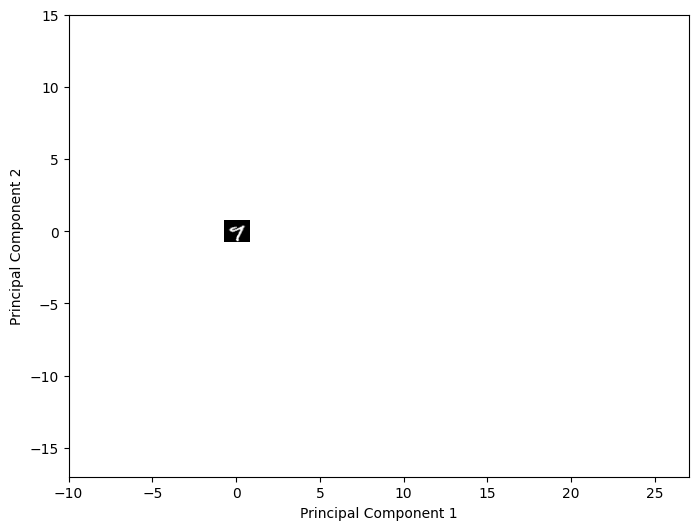

In [45]:
# Chiamare la funzione plot_pca_with_images per visualizzare le immagini proiettate nello spazio delle prime due componenti principali della PCA

plot_pca_with_images(X,X_standardizzato,y) #non viene eseguito come desiderato
# svolgimento...

## **PCA con scikit-learn**

Possiamo applicare la PCA anche utilizzando il pacchetto `scikit-learn`. Con quest' ultimo infatti l' intero processo visto precedentemente è parecchio semplificato. 

Gli step da seguire in questo caso sono:

1. **Caricare e standardizzare i dati**

2. **Applicare PCA**

3. **Calcolare la varianza espressa**

4. **Visualizzare i dati nel nuovo spazio**

## **Step 1 - Caricare e standardizzare i dati**

Per caricare i dati la procedura è uguale a quanto fatto in precedenza. Per quanto riguardala standardizzazione invece utilizzeremo direttamente l'oggetto di `scikit-learn`:

- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): Standardizza i dati rimuovendo la media e scalandoli a varianza unitaria. 

In [40]:
# Carichiamo il dataset

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data       
y = mnist.target.astype(int)  

# Inizializziamo un' istanza di `StandardScaler`, non è necessario specificare alcun parametro.
# svolgimento...

scaler = StandardScaler()

# Utilizziamo lo scaler sui nostri dati. 
# Lo scaler possiede il medooto .fit_transform che utilizzeremo per scalare i dati. Questo metodo ha bisogno dei dati come parametro.

# svolgimento...

X_standardizzato = scaler.fit_transform(X)



## **Step 2 - Applicare la PCA**

Per applicare la PCA utilizziamo direttamente l' implementazione di `scikit-learn`:

- [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html): Implementazione di Principal Component Analysis (PCA) in `scikit-learn`.



In [42]:
# Istanziamo la classe PCA specificando come parametro il numero di componenti.
# Utilizziamo il metodo fit_transform della PCA per calcolarle.

n_components = 2

# svolgimento...

from sklearn.decomposition import PCA

n_componenti = 2

pca = PCA(n_components=n_componenti)

X_pca = pca.fit_transform(X_standardizzato)

print(f"Forma dei dati dopo PCA: {X_pca.shape}")


NameError: name 'PCA' is not defined

## **Step 3 - Calcolare la varianza espressa**

L' oggetto PCA appena istanziato possiede un attributo che ci permette di valutare quanta varianza viene espressa:

- [PCA - explained_variance_ratio_](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) L' attributo `explained_variance_ratio_` nella PCA di `scikit-learn` ci da la varianza espressa dalla PCA.

In [46]:
# Estrarre e stampare la varianza espressa tramite l' attributo explained_variance_ratio_ della PCA.

# svolgimento...

from sklearn.decomposition import PCA

# Supponiamo di avere già i dati standardizzati in X_standardizzato
# Eseguiamo la PCA mantenendo tutte le componenti principali
pca = PCA()
pca.fit(X_standardizzato)

varianza_espressa = pca.explained_variance_ratio_

varianza_cumulativa = np.cumsum(varianza_espressa)

print("Varianza espressa per componente principale:\n", varianza_espressa[:10])
print("Varianza cumulativa:\n", varianza_cumulativa[:10])




## **Step 4 - Visualizzare i dati nel nuovo spazio**

In [ ]:
# Visualizziamo i risultati utilizzando le stesse funzioni viste in precedenza 

# svolgimento...

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.5, marker='.')
plt.xlabel("Prima Componente Principale")
plt.ylabel("Seconda Componente Principale")
plt.title("Dati")
plt.show()
